### Basic Ergonomic Colors
Here is a small set of colors in groups of consistent brightnesses and chromas:

In [1]:
SIMPLE_COLORS = [
    [["#000000"]],
    [["#4a4a4a"],
     ["#5f3d60", "#4a4d20","#22544c"],
     ["#8f0000", "#0038db"]], 
    [["#868786"],
     ["#a77a60", "#9a7c96", "#768aa3","#758f6d"],
     ["#d45c00", "#cf42cd", "#1b8cfe","#28a113"]], 
    [["#dbdbdb"],
     ["#fbccda", "#f4d5a8", "#bfe7c1", "#c0e3ec","#ddd6fd"],
     ["#ffd62b", "#b6f14d", "#4aff99"]], 
    [["#f4f5f4"],
     ["#d7ffed", "#fff4c9"],
     ["#fafd51"]],
    [["#ffffff"]]
]

In [2]:
from IPython.display import HTML
from hyooze import * # github.com/TedSinger/hyooze
HTML(demo(SIMPLE_COLORS))

By picking colors across brightness groups, you get a consistent contrast ratio. Any color pair not using the middle group will at least hover around WCAG AAA for any size text. Readability counts!

By picking colors of different chromas in the same brightness group, you can easily create the [attention hierarchy](https://colorusage.arc.nasa.gov/Percept_layers_1.php) for your application without sacrificing contrast ratio unexpectedly.

By picking colors of different hue in the same brightness+chroma group, you can add boundary hints (such as syntax highlighting or zebra striping) without interfering with the attention hierarchy or contrast ratio.

This was tricky! Equal spacing in RGB or HSL does the wrong thing. The brightness and chroma _perceptual correlates_ are totally unaligned with the RGB colorspace, and not consistently correlated with HSL or any other computer-and-mathematics-friendly colorspace:

In [3]:
HTML(LIME_ON_BLUE)

The green in our RGB monitors is much brighter (perceptually, if not physically) than the red or blue. This is why the above table is missing dark saturated green or bright saturated red and blue. Those colors just aren't possible on our displays under normal calibration.

The shape of the RGB color gamut in a perceptually uniform space (I chose CIECAM02) is complicated. But mathematically, our problem is straightforward. We want contours of equal brightness and equal chroma.

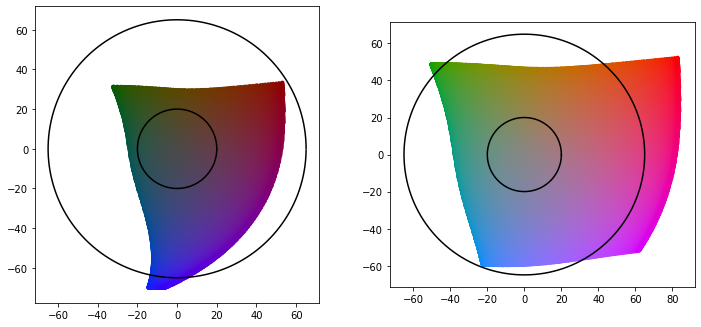

In [4]:
%matplotlib inline
matches, fig = ciecam02_brightness_planes(BRIGHT_OFFICE, [68, 106], [20, 65])

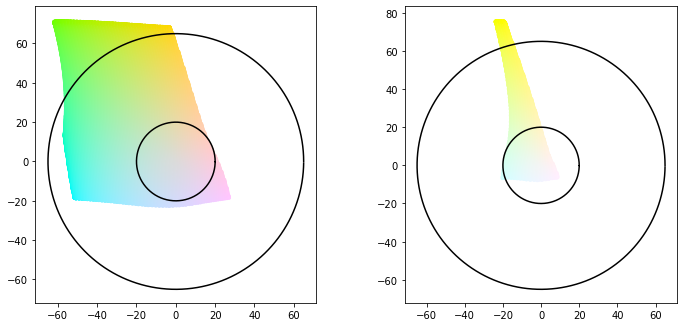

In [5]:
lighter_matches, fig = ciecam02_brightness_planes(BRIGHT_OFFICE, [155, 169], [20, 65])
matches.update(lighter_matches)

The precise brightness and chroma values that I am using are manually adjusted. Naturally, the brightnesses are well separated, and the chromas just barely touch corners of the feasible gamut. Should I keep the constraint that each brightness level must use the same pair of chroma levels? Relaxing that constraint would allow a bright saturated cyan.

The hues for saturated colors are as separated as possible, given their constraints. The hues for pastels have a degree of freedom, which I have resolved arbitrarily. I'm open to suggestions for the best choice on that.

In [6]:
for brightness, chromas in matches.items():
    for chroma, hues in chromas.items():
        if chroma == 0:
            print(brightness, chroma, hues)
        else:
            arc = ArcDict(hues, 5)
            print(brightness, chroma, arc)

68 20 ArcDict([-179.6: #19564b, 179.9: #1b554a])
68 65 ArcDict([-101.5: #0038db, -81.6: #5600df], [32.2: #8f0000])
68 0 #4a4a4a
106 20 ArcDict([-180.0: #679187, 180.0: #639287])
106 65 ArcDict([-111.2: #008dfd, -108.1: #298aff], [-64.5: #a460ff, 49.4: #d55b00], [129.3: #4c9d00, 139.1: #00a229])
106 0 #878686
155 20 ArcDict([-179.5: #b6e8dc, 179.9: #b7e7db])
155 65 ArcDict([91.0: #ffd62c, 153.1: #3fff9e])
155 0 #dbdbdb
169 20 ArcDict([-179.8: #d3fff4, -159.6: #d8feff], [89.8: #fff4c9, 179.8: #d4fff4])
169 65 ArcDict([103.1: #fffb54, 108.6: #f1ff5a])
169 0 #f5f4f4


In [ ]:
'''TODO:
Dim office?

CIECAM is for dyes. Switch to a model for luminous stimuli:
https://www.osapublishing.org/josaa/fulltext.cfm?uri=josaa-35-12-2000&id=401230

incorporate H-K effect: that blue peninsula jutting out of the dark plane is quite prominent
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2659800/
'''